# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as ss
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Few nice colors
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'
COLOR6 = '#2c7fb8'
COLOR7 = '#d95f0e'
COLOR8 = '#31a354'
COLOR9 = '#fdae6b'
COLOR10 = '#f03b20'

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:/MyBriefCase/SpringBoard/CapstoneProject/Reduce Hospital Readmission/hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\aniru\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


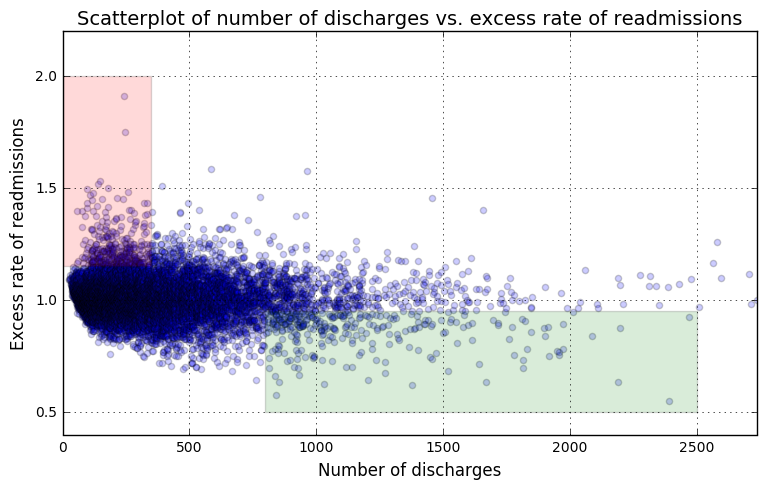

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

###### Removing insignificant records from Data-frame 

In [6]:
allRelevantHos = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0]
allRelevantHos.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


Being a critique of preliminary analysis of readmissions data and suggested recommendations for reducing the readmissions rate I would like to do difference of sample means distribution between 2 set of data. Basially would like to compare excess readmission ratio of small hospitals (discharge capacity < 300) with the excess readmission ratio of large hospitals (discharge capacity >= 300)  

###### Determine Sample Mean and Standard Deviation of Small hospitals

In [7]:
smallHos = allRelevantHos[allRelevantHos['Number of Discharges'] < 300]
#smallHos.describe()
smallHosMean = np.mean(smallHos['Excess Readmission Ratio'])
smallHosStd = np.std(smallHos['Excess Readmission Ratio'])
smallHosSize = len(smallHos['Excess Readmission Ratio'])
smallHosMean, smallHosStd, smallHosSize

(1.0142382121807445, 0.08247145651495595, 6108)

###### Determine Sample Mean and Standard Deviation of Large hospitals

In [8]:
largeHos = allRelevantHos[allRelevantHos['Number of Discharges'] >= 300]
largeHos.describe()
largeHosMean = np.mean(largeHos['Excess Readmission Ratio'])
largeHosStd = np.std(largeHos['Excess Readmission Ratio'])
largeHosSize = len(largeHos['Excess Readmission Ratio'])
largeHosMean, largeHosStd, largeHosSize

C:\Users\aniru\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


(0.9998708480237513, 0.1011088761383622, 5389)

###### The difference of Mean between 2 groups is

In [9]:
hosMeanD = smallHosMean - largeHosMean
hosMeanD

0.014367364156993245

###### The Standard Error of difference of Mean between Large and Small group of hospitals is square-root of sum of square of Standard Error(SE) of Large and square of Standard Error(SE) of Small hospitals

In [10]:
hosSED = np.sqrt(np.square(largeHosStd)/largeHosSize + np.square(smallHosStd)/smallHosSize)
hosSED

0.0017350964484110576

With 95% confidence level we would like to determine Margin of Error using z-stat table. The critical z value with 2-tailed distribution is 1.96. 

###### The Margin of Error (MOE) of difference of Mean between 2 groups

In [11]:
zCVal = 1.96
hosMOED = zCVal * hosSED
hosMOED

0.0034007890388856729

There is 95% chance that mean of Sample means is within 0.0034007890388856729 of difference of sample mean i.e. 0.014367364156993245 either side

###### The 95% Confidence Interval for the difference of Mean between 2 groups
The lower-end of Confidence Interval(CIL) is

In [12]:
CIL = hosMeanD - hosMOED
CIL

0.010966575118107572

###### The 95% Confidence Interval for the difference of Mean between 2 groups
The upper-end of Confidence Interval(CIU) is

In [13]:
CIU = hosMeanD + hosMOED
CIU

0.017768153195878919

With 95% confidence, we can say that the mean 'Excess Readmission Ratio' of small hospital groups as compare to the mean 'Excess Readmission Ratio' of large hospital groups differs in between 1.09% and 1.77%, based on the sample data

#### Hypothesis Testing with 1% Significance Level
**Null Hypothesis (H0)**: The mean (MUS) 'Excess Readmission Ratio' of small hospital groups equals the mean (MUL) 'Excess Readmission Ratio' of large hospital groups. MUS = MUL

**Alternative Hypothesis (H1)**: The mean (MUS) 'Excess Readmission Ratio' of small hospital groups differs from the mean (MUL) 'Excess Readmission Ratio' of large hospital groups. MUS != MUL

Assume H0 is true then (MUS - MUL) = 0 then the computed t score stat (we don't know the SD of the Population)

In [14]:
tval = (hosMeanD - 0)/hosSED
tval

8.2804412228210076

This means the sample mean (0.014367364156993245) is 8.28044 times standard deviation away from the Null hypothesis(H0) mean i.e. Zero(0). In order to reject the H0 this has to be less probable (occurrence) than the significance level (alpha) of 1%.
This is a two-tail test. An extreme is either far above the mean or far below the mean will allow us to reject H0. The P-value is the probability that the t-score is less than -8.28044 or greater than 8.28044 .
Having Normal Sampling Distribution of Sample Mean we have to find P(t < -8.28044) and P(t > 8.28044) 

###### Thus, the P-value

In [15]:
PL = 0.0005 #P(t < -8.28044)
PR = 0.0005 #P(t > 8.28044)
pval = PL + PR
pval

0.001

###### Since the P-value (0.001) is less than the significance level alpha (0.01), we reject H0.

#### Conclusion
We don’t know 100% but statistically we are in favor of the idea the mean 'Excess Readmission Ratio' of small hospital groups differs from the mean 'Excess Readmission Ratio' of large hospital groups differs. Although the difference is not that significant. 

In our test the sample size is huge. With a mean difference of max 1.77% between 2 group doesn't have practical significance. This difference may diminish further if we consider some other sample data. In this type of situation Confidence intervals are often more useful than hypothesis tests because they provide a way to assess practical significance in addition to statistical significance. They help us to determine what a parameter value is, instead of what it is not.

In order to provide quality care hospitals/fcilities with small capacity (< 300 number of discharge) can be upgraded with better resource allocation and optimization. However consolidation of smaller hospitals and facilities is a debatable issue. Unless we know or analyze other data such as the nature of services, crew strength, interdependencies across hospitals, location etc it is not prudent to suggest for consolidation.

###### Advantages & Disadvantages of the current plot
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

** Advantages **
+ All hospitals data have been plotted and available for review
+ We can find the concentration level

** Disadvantages **
+ Unable to tell if "Excess Admission Ratio" is really changing as the number of discharges increases
+ Unable to tell the number of occurrences of 'Excess Readmission Ratio' of similar capacity hospital without the opacity dimension of the scatter plot

#### Construction of another Plot

136


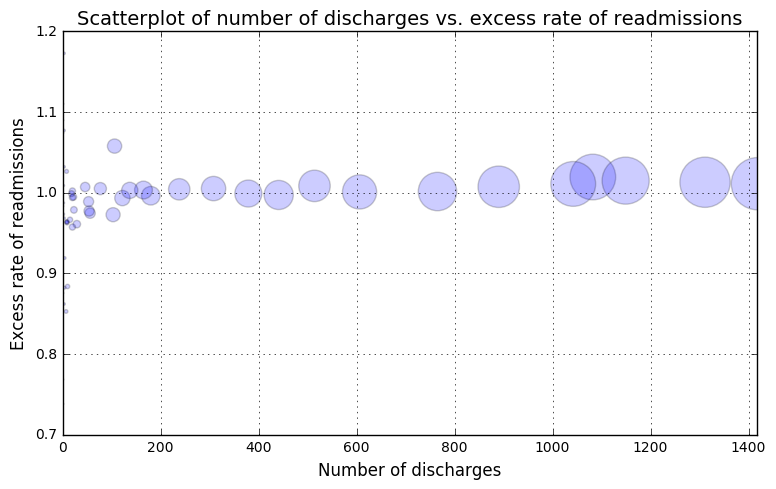

In [16]:
maxDischarge = np.max(allRelevantHos['Number of Discharges'])

plotBin = 50
maxIteration = int(maxDischarge/plotBin)
modVal = maxDischarge%plotBin
if modVal > 0:
    maxIteration = maxIteration + 1
print(maxIteration)
lowerEndBin = 0 
upperEndBin = plotBin

xList = []
yList = []

# Loop
for index in range(0, maxIteration):
    hosRange = allRelevantHos[(allRelevantHos['Number of Discharges'] >= lowerEndBin) & (allRelevantHos['Number of Discharges'] < upperEndBin)]
    xList.append(len(hosRange))
    yList.append(np.mean(hosRange['Excess Readmission Ratio']))
    lowerEndBin = upperEndBin
    upperEndBin = (index + 2) * plotBin


fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(xList, yList, s=xList, alpha = 0.2)

ax.set_xlim([0, max(xList)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()


** The above plot depicts that there is no signifant difference on 'Excess Readmission Ratio' between small and large hospitals**